<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Your observations here**

+ Hay el doble de registros en el Channel numero 2
+ La mayoria son de la Region 3
+ Hay colinealidad entre Grocery y Detergents_Paper
+ Posibles outliers en las diferentes categorias al comparar el maximo con la media



In [5]:
#You code here
customers.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
1        1       514    8323   6869     529     93                1040          1
         3       43088  2100   2609     1200    1107              823           1
2        1       1073   9679   15445    61      5980              1265          1
                 572    9763   22182    2221    4882              2563          1
                 18     7504   15205    1285    4797              6372          1
                                                                               ..
1        3       4446   906    1238     3576    153               1014          1
                 4420   5139   2661     8872    1321              181           1
                 4020   3234   1498     2395    264               255           1
                 3884   3801   1641     876     397               4829          1
2        3       44466  54259  55571    7782    24171             6465          1
Length: 440, dtype: i

In [6]:
#You code here
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
#You code here
customers.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
#You code here
customers.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

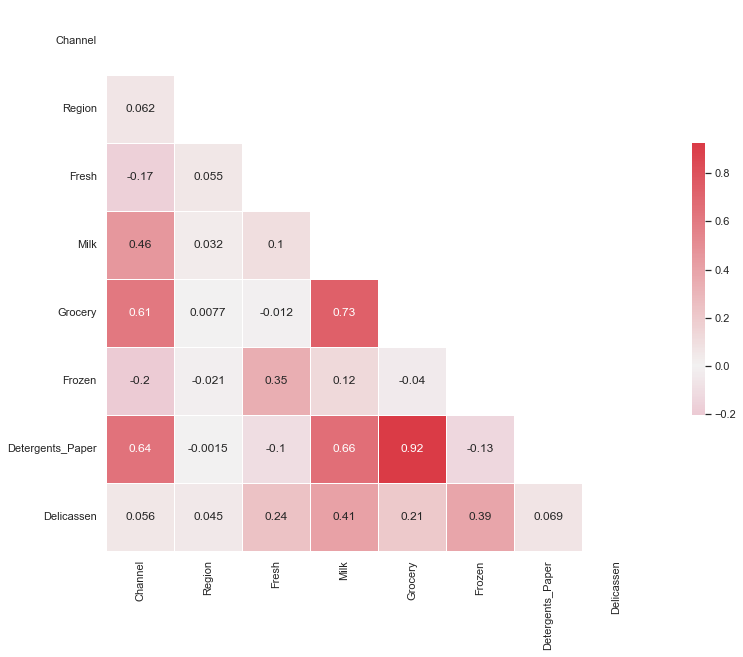

In [9]:
#You code here
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(customers.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(customers.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

<AxesSubplot:>

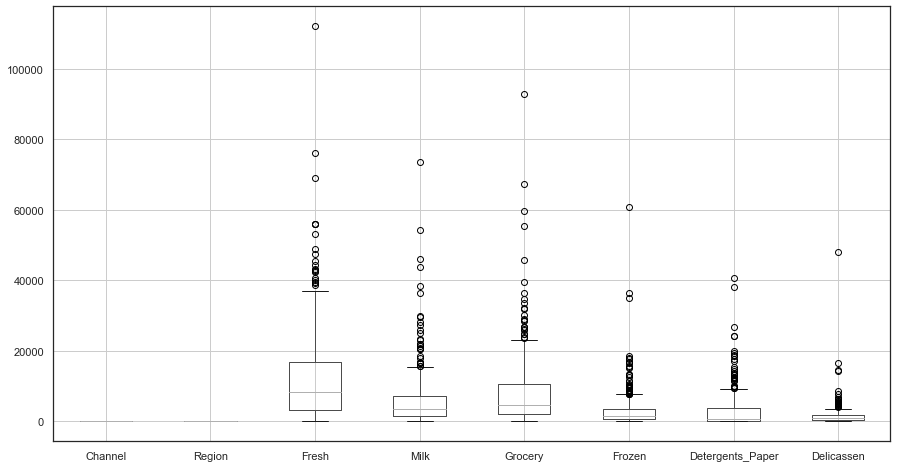

In [10]:
customers.boxplot(figsize=(15,8))

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
# Your code here
stats=customers.describe().T
stats['IQR']=stats['75%']-stats['25%']
outliers=pd.DataFrame(columns=stats.index)
for c in stats.index:
    iqr=stats.at[c, 'IQR']
    cutoff=1.5 * iqr   # test de tukey
    lower=stats.at[c, '25%'] - cutoff
    upper=stats.at[c, '75%'] + cutoff
    res=customers[(customers[c] < lower) | (customers[c] > upper)].copy()
    res['outliers']=c
    outliers=outliers.append(res, sort=True)
outliers['outliers'].value_counts()
clean_index=[i for i in customers.index if i not in outliers.index]
customers=customers.iloc[clean_index]

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_9775/947031177.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers=outliers.append(res, sort=True)
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_9775/947031177.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers=outliers.append(res, sort=True)
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_9775/947031177.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers=outliers.append(res, sort=True)
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_9775/947031177.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers=outl

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


<AxesSubplot:>

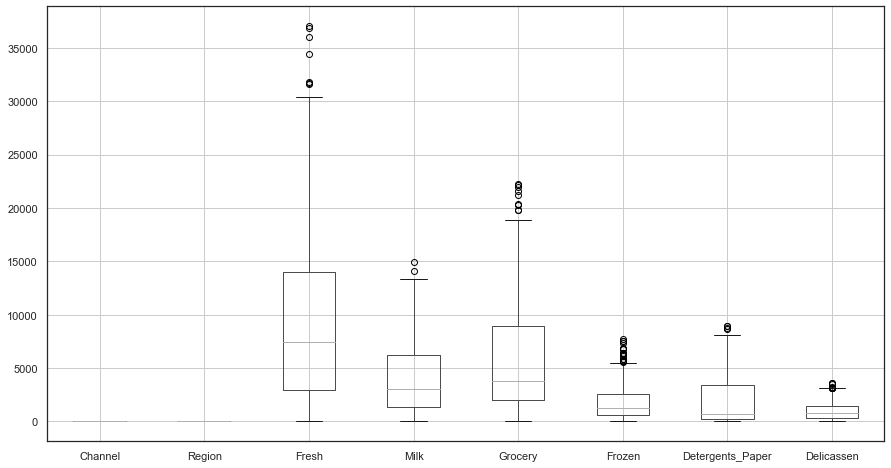

In [14]:
customers.boxplot(figsize=(15,8))

**Your comment here**

+ Hemos eliminado los outliers
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


In [16]:
scaler=StandardScaler()

In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


In [18]:
customers_scale=customers.copy()

In [19]:
customers_scale[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']]=\
scaler.fit_transform(customers_scale[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']])

customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,2,3,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
3,1,3,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
5,2,3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
6,2,3,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
import pylab as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(customers_scale)
# Your code here:


KMeans(n_clusters=6)

In [22]:
#cols=customers_scale.columns
#cols

In [23]:
#clusters=kmeans.fit(customers_scale[cols])

In [24]:
#dict(zip(cols, clusters.cluster_centers_[0]))

In [25]:
#preds=clusters.fit_predict(customers_scale[cols])

#preds[100:200]

In [26]:
#distancias=clusters.fit_transform(customers_scale[cols])

#len(distancias)

In [27]:
labels=kmeans.labels_

In [28]:
customers['labels']=labels

customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
3,1,3,13265,1196,4221,6404,507,1788,5
5,2,3,9413,8259,5126,666,1795,1451,2
6,2,3,12126,3199,6975,480,3140,545,3


In [29]:
customers_scale.shape

(332, 8)

Count the values in `labels`.

In [30]:
# Your code here:
customers.labels.value_counts()

3    110
4     51
2     45
5     44
1     41
0     41
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [31]:
# Your code here
from sklearn.cluster import DBSCAN 


In [32]:
dbscan=DBSCAN(eps=0.5)

dbscan.fit(customers_scale)

DBSCAN()

In [33]:
labels_DBSCAN=dbscan.labels_

In [34]:
customers['labels_DBSCAN']=labels_DBSCAN

Count the values in `labels_DBSCAN`.

In [35]:
# Your code here
customers.labels_DBSCAN.value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

In [36]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
3,1,3,13265,1196,4221,6404,507,1788,5,-1
5,2,3,9413,8259,5126,666,1795,1451,2,-1
6,2,3,12126,3199,6975,480,3140,545,3,-1


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [37]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
 8   labels            332 non-null    int32
 9   labels_DBSCAN     332 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 27.2 KB


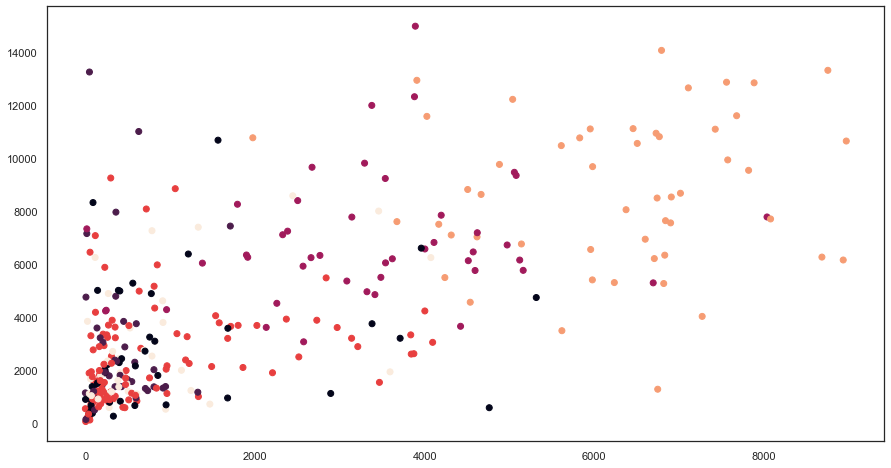

In [38]:
# Your code here:
plt.figure(figsize=(15,8))
plt.scatter(customers.Detergents_Paper, customers.Milk, c=labels);

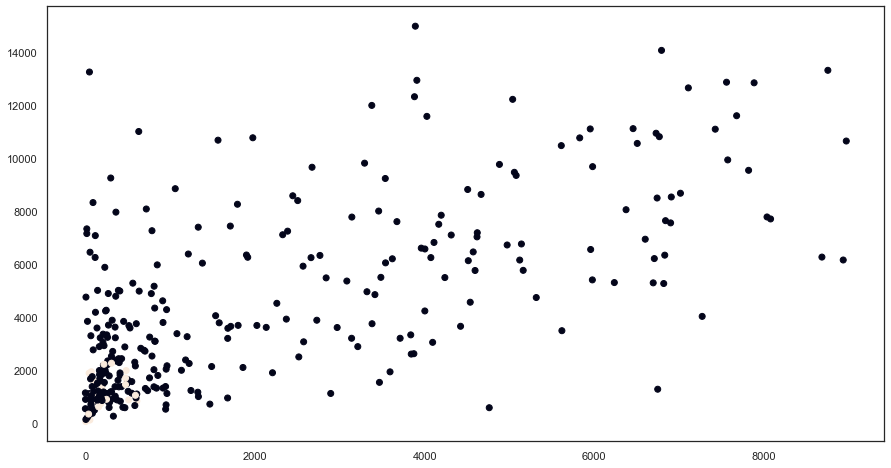

In [39]:
# Your code here:
plt.figure(figsize=(15,8))
plt.scatter(customers.Detergents_Paper, customers.Milk, c=labels_DBSCAN);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

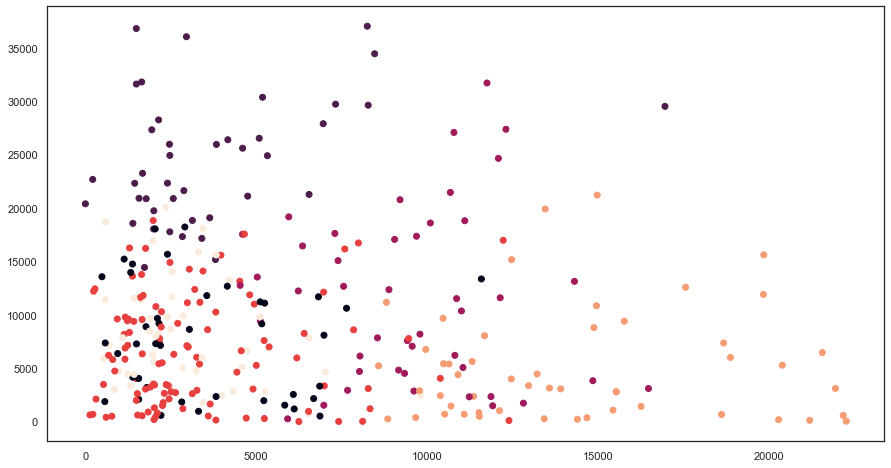

In [40]:
# Your code here:
plt.figure(figsize=(15,8))
plt.scatter(customers.Grocery, customers.Fresh, c=labels);

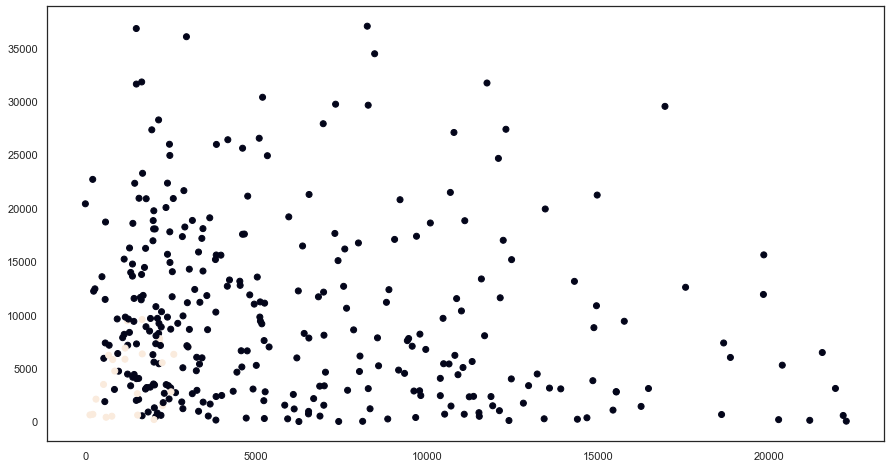

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(customers.Grocery, customers.Fresh, c=labels_DBSCAN);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

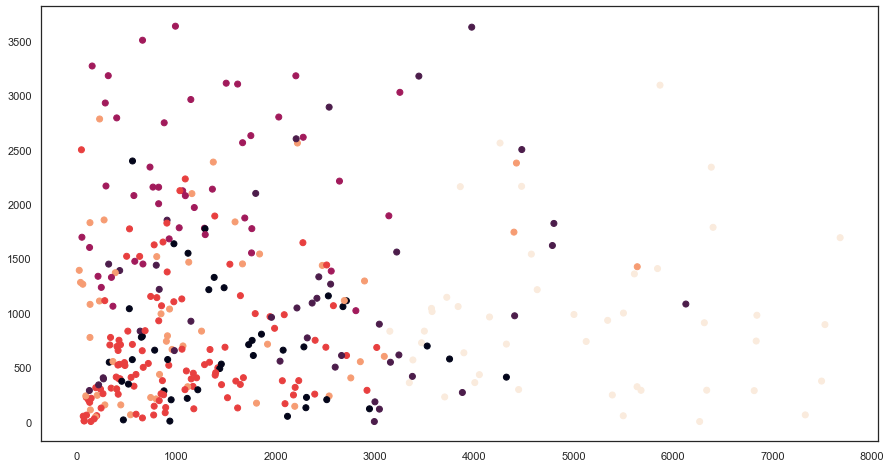

In [42]:
# Your code here:
plt.figure(figsize=(15,8))
plt.scatter(customers.Frozen, customers.Delicassen, c=labels);

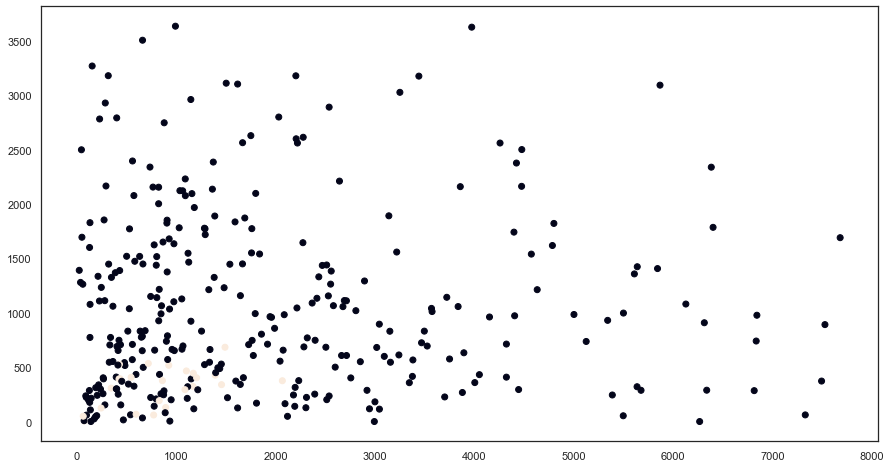

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(customers.Frozen, customers.Delicassen, c=labels_DBSCAN);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [47]:
# Your code here:
customers.groupby('labels')['Detergents_Paper'].mean()

labels
0    1008.634146
1     425.317073
2    3334.911111
3     824.618182
4    6241.294118
5     738.704545
Name: Detergents_Paper, dtype: float64

In [48]:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.048780,1.195122,7688.365854,2708.512195,3588.951220,1590.804878,1008.634146,703.073171,-1.000000
1,1.000000,2.512195,24505.341463,2874.195122,3742.317073,2391.829268,425.317073,1158.390244,-1.000000
2,1.733333,2.844444,11440.866667,6867.288889,9496.000000,1186.577778,3334.911111,2203.933333,-1.000000
3,1.100000,2.954545,6523.572727,2408.645455,3283.463636,1008.936364,824.618182,633.363636,-0.781818
4,1.921569,2.568627,5045.509804,8718.000000,14348.803922,1297.098039,6241.294118,993.509804,-1.000000
5,1.045455,2.431818,8182.750000,2623.454545,2950.727273,5107.113636,738.704545,947.181818,-1.000000


In [49]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.308442,2.503247,9952.808442,4337.454545,6223.438312,1942.230519,2093.649351,1070.172078,2.63961
0,1.000000,3.000000,4344.625000,1124.333333,1411.875000,846.875000,230.666667,329.125000,3.00000


Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [50]:
# Your code here

from sklearn import cluster, datasets

n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(customers_scale).inertia_) for k in range(1, 10)])


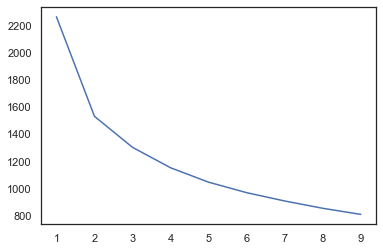

In [51]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia);

In [53]:
%pip install yellowbrick

     |████████████████████████████████| 282 kB 3.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


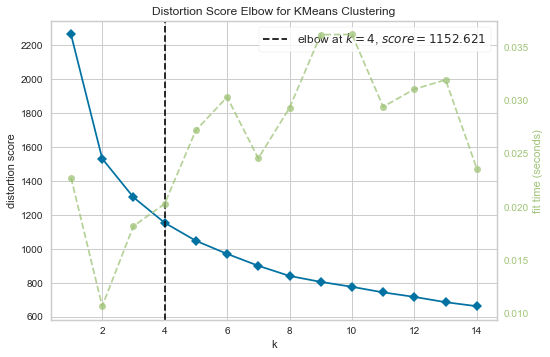

In [54]:
from yellowbrick.cluster import KElbowVisualizer

modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(customers_scale)

visual.poof();

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [55]:
# Your code here
dbscan=DBSCAN(eps=1.5)

dbscan.fit(customers_scale)

labels_DBSCAN=dbscan.labels_

In [57]:
customers['labels_DBSCAN']=labels_DBSCAN

In [58]:
labels_DBSCAN

array([ 0,  0,  0,  0,  0,  0,  0,  1, -1,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  1,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [59]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,0
1,2,3,7057,9810,9568,1762,3293,1776,2,0
3,1,3,13265,1196,4221,6404,507,1788,5,0
5,2,3,9413,8259,5126,666,1795,1451,2,0
6,2,3,12126,3199,6975,480,3140,545,3,0


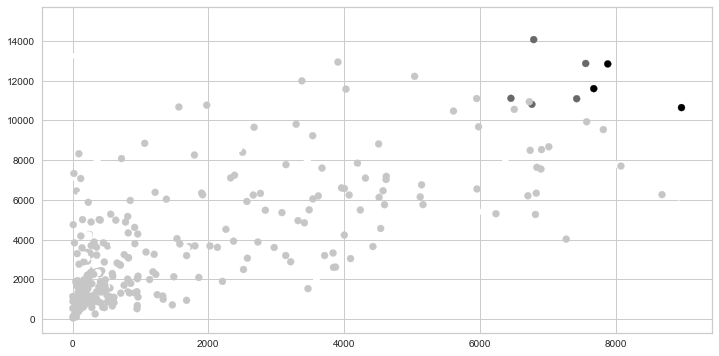

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels_DBSCAN);

**Your comment here**

+ No hay una clusterización clara
